# Project UAV
Version 1.0

#### call packages

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from scipy.spatial import distance_matrix


#### initial parameters

In [153]:
NUM_GU = 10  # number of ground users

X_MIN = 0  # minimum x-axis [meter]
X_MAX = 100  # maximum x-axis [meter]
Y_MIN = 0  # minimum y-axis [meter]
Y_MAX = 100  # maximum y-axis [mseter]

UAV_ALTITUDE = 10  # altitude of uav [meter]
MAX_BEAM_ANGLE = 60  # maximum beamforming angle [degree]

# maximum beamforming diameter [meter]
MAX_BEAM_DIAMETER = 2*UAV_ALTITUDE*np.tan(MAX_BEAM_ANGLE*np.pi/180)

X_GRID = 10  # number of x grid
Y_GRID = 10  # number of y grid


UAV_TX_POWER = 30  # uav's transmit power in [dBm]

#### initial variables

In [154]:
t = 0  # time [seconds]

gu_bat = np.zeros((NUM_GU,)) # battery of ground user [mWh]


#### generate variables

In [135]:
# generate ground user location randomly x,y,z [meters]
gu_x = np.random.uniform(low=X_MIN, high=X_MAX, size=(NUM_GU,))
gu_y = np.random.uniform(low=Y_MIN, high=Y_MAX, size=(NUM_GU,))
gu_z = np.zeros((NUM_GU,))

# print
gu_x, gu_y, gu_z



(array([ 8.80465067, 70.12582043, 33.51185793, 88.2525136 , 50.84411376,
        14.07766038, 27.73909403, 38.99237965, 49.3664574 , 15.39334383]),
 array([71.03136002, 73.85314324, 54.36566852, 76.44805427, 25.31284063,
        21.40667787, 74.53099568, 68.70644454, 42.31885344, 53.18091102]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [136]:
# generate meshgrid
tmp_x = np.linspace(X_MIN + X_GRID/2,X_MAX-X_GRID/2,X_GRID)
tmp_y = np.linspace(Y_MIN + Y_GRID/2,Y_MAX-Y_GRID/2,Y_GRID)
GRID = np.array(np.meshgrid(tmp_x, tmp_y))

GRID

array([[[ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
        [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.]],

       [[ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
        [15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
        [35., 35., 35., 35., 35., 35., 35., 35., 35., 35.],
        [45., 45., 45., 45., 45., 45., 45., 45., 45., 45.],
        [55., 55., 55., 55., 55., 55., 55., 55., 55., 55.],
        [65., 65., 65., 65., 65., 65.,

In [150]:
# generate uav location

uav_x_pos = 0  # x position of uav 0,1,...,GRID_SIZE-1
uav_y_pos = 0  # y position of uav 0,1,...,GRID_SIZE-1

uav_x = GRID[0, uav_x_pos, uav_y_pos]
uav_y = GRID[1, uav_x_pos, uav_y_pos]
uav_z = UAV_ALTITUDE  # uav's altitude [meter]


# print
uav_x, uav_y, uav_z

(5.0, 5.0, 10)

#### plot environment

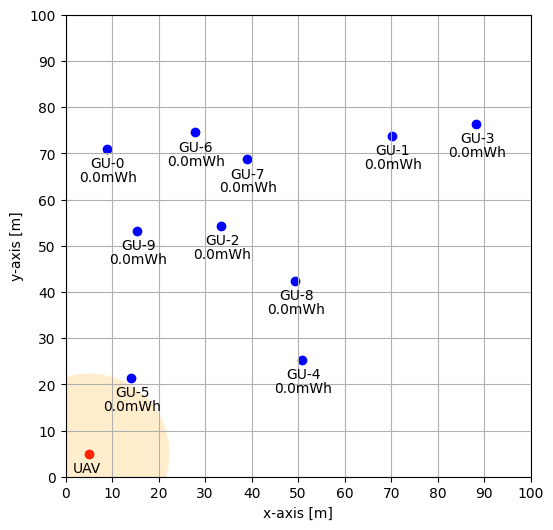

In [149]:
fig, ax = plt.subplots(figsize=(6, 6))


plt.scatter(x=uav_x, y=uav_y, c="red")
plt.text(x=uav_x - 3.5, y=uav_y - 4, s=f"UAV")
beam_circle = Ellipse(
    xy=(uav_x, uav_y),
    width=MAX_BEAM_DIAMETER,
    height=MAX_BEAM_DIAMETER,
    angle=0,
    edgecolor="none",
    facecolor="orange",
    alpha=0.2,
)
uav_beam = ax.add_patch(beam_circle)


for i in range(NUM_GU):
    plt.scatter(x=gu_x[i], y=gu_y[i], c="blue")
    plt.text(x=gu_x[i] - 3.5, y=gu_y[i] - 4, s=f"GU-{i}")
    plt.text(x=gu_x[i] - 6, y=gu_y[i] - 7, s=f"{gu_bat[i]}mWh")


plt.xlabel("x-axis [m]")
plt.ylabel("y-axis [m]")

plt.xticks(np.arange(X_MIN, X_MAX + 1, X_GRID))
plt.yticks(np.arange(Y_MIN, Y_MAX + 1, Y_GRID))

plt.xlim(X_MIN, X_MAX)
plt.ylim(Y_MIN, Y_MAX)

plt.grid()

plt.show()